In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

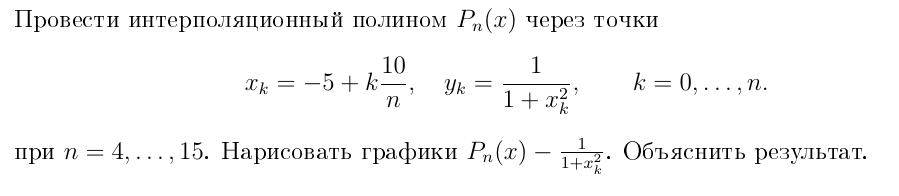

In [2]:
Image('task 5.png')

In [3]:
N = np.arange(4, 16)

get_x = lambda k, n: -5 + 10 * k / n
get_y = lambda x: 1 / (1 + pow(x, 2))

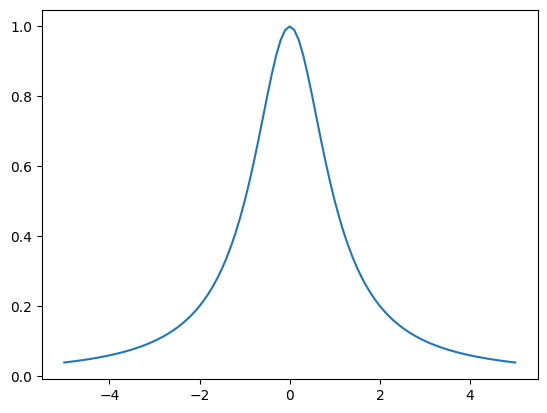

In [4]:
n = 100

k = np.arange(0, n+1)
x = get_x(k, n)
y = get_y(x)
plt.plot(x, y)

In [5]:
def ddiff(x, y):
    diffs = np.copy(y)
    for i in np.arange(1, len(y)):
        diffs[i:] = (diffs[i:] - diffs[i - 1]) / (x[i:] - x[i - 1])
    return diffs

In [6]:
def Horner(n, x, x_src, y_src):
    coeff = ddiff(x_src, y_src)
    polynomial = coeff[n]
    for i in np.arange(1, n + 1):
        polynomial = coeff[n - i] + (x - x_src[n - i]) * polynomial
    return polynomial

In [7]:
points_x = []
points_y = []
P_n = []
sub_n = []

a = -5
b = 5
M = 100
x = np.linspace(a, b, M)

for n in N:
    k = np.arange(n+1)
    xk = get_x(k, n)
    yk = get_y(xk)
    points_x += [xk]
    points_y += [yk]
    P_n += [[Horner(n, t, xk, yk) for t in x]]
    sub_n += [P_n[-1] - get_y(x)]

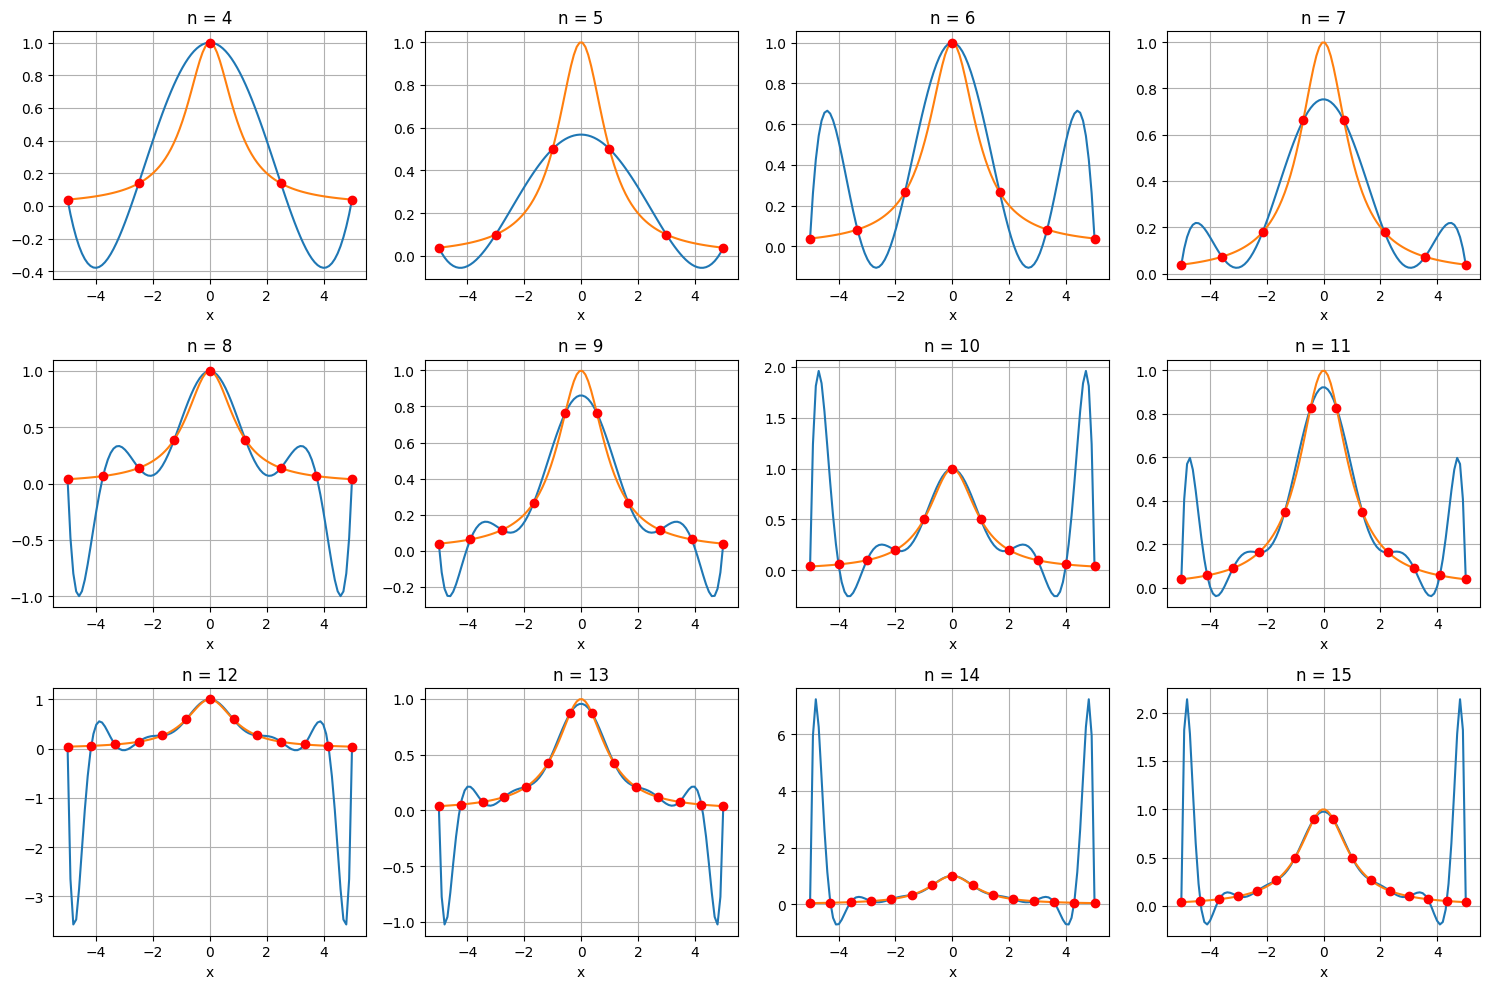

In [8]:
plt.figure(figsize=(15,10))

for n in N:
    plt.subplot(3, 4, n - N[0] + 1)

    plt.plot(x, P_n[n-4], label=r'$P_{'+str(n)+'}$')
    plt.plot(x, get_y(x), label='func')
    plt.plot(points_x[n-4], points_y[n-4], 'ro', label='Interpolation points')

    plt.xlabel('x')
    plt.title('n = '+ str(n))
    plt.grid()

plt.tight_layout()
plt.show()

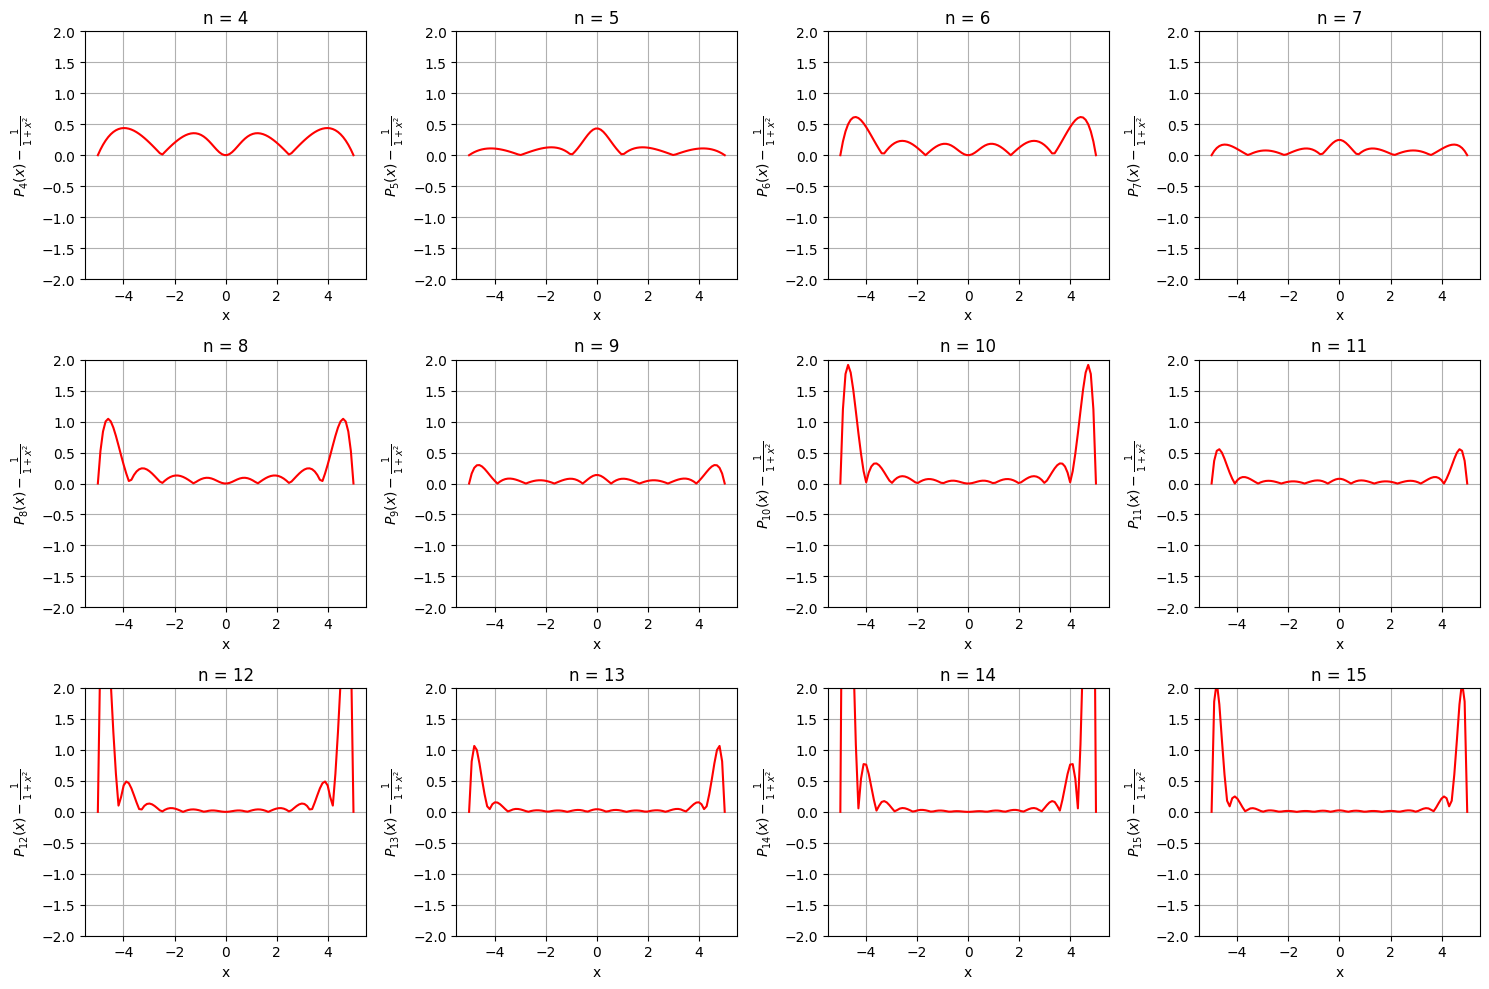

In [9]:
plt.figure(figsize=(15,10))

for n in N:
    plt.subplot(3, 4, n - N[0] + 1)
    plt.plot(x, abs(sub_n[n - 4]), 'r-')
    plt.xlabel('x')
    plt.ylabel(r'$P_{'+str(n)+'}(x) - \\frac{1}{1+x^2}$')
    plt.title('n = '+ str(n))
    plt.grid()
    plt.ylim([-2, 2])

plt.tight_layout()
plt.show()

Runge's phenomenon

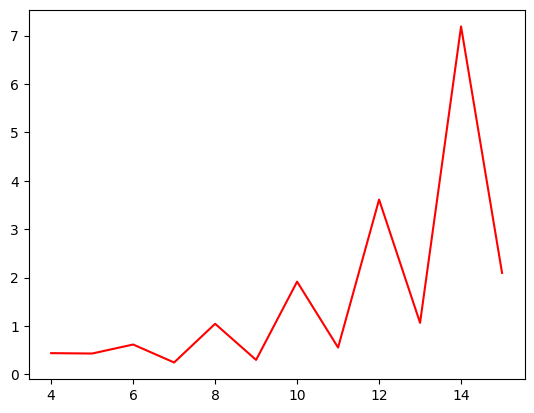

In [11]:
plt.plot(N, [np.max(abs(sub_n[n - 4])) for n in N], 'r-')


 ${ \Large\displaystyle \lim_{n\rightarrow\infty} \left ( \max_{a\leq x \leq b} \left | f(x)-P_{n}(x) \right | \right ) = \infty.}$

${\Large The\ magnitude\ of\ the\ n-th\ order\ derivatives\ of\ this\ particular\ function\ grows\ quickly\ when\ n\ increases.}$



${\Large The\ error\ between\ the\ generating\ function\ and\ the\ interpolating\ polynomial\ of\ order\ n\ is\ given\ by:} \\
{\Large\displaystyle f(x)-P_{n}(x)={\frac {f^{(n+1)}(\xi )}{(n+1)!}}\prod _{i=0}^{n}(x-x_{i})} \\
{\Large\forall \displaystyle \xi \in (−1, 1) $

${\Large \displaystyle \max _{-1\leq x\leq 1}|f(x)-P_{n}(x)|\leq \max _{-1\leq x\leq 1}{\frac {\left|f^{(n+1)}(x)\right|}{(n+1)!}}\max _{-1\leq x\leq 1}|w_{n}(x)|}.$

${\Large \displaystyle W_{n}=\max _{-1\leq x\leq 1}|w_{n}(x)|}. \\
 {\Large \displaystyle W_{n}\leq n!h^{n+1}}

$

${\Large\ But\ the\ value\ of\ the\ (n + 1)th\ derivative\ of\ the\ Runge\ function\ increases\ as\ n\ increases\ (See p79).}$